In [1]:
# A blank canvas...

In [2]:
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet, fcluster
from scipy.spatial.distance import pdist

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
response = requests.get('https://api.data.gov/ed//collegescorecard/v1/schools?fields=school.name,id,2015.student.demographics.race_ethnicity.white,2015.student.demographics.race_ethnicity.black,2015.student.demographics.race_ethnicity.hispanic,2015.student.demographics.race_ethnicity.asian,2015.student.demographics.race_ethnicity.aian,2015.student.demographics.race_ethnicity.nhpi,2015.student.demographics.race_ethnicity.two_or_more,2015.student.demographics.race_ethnicity.non_resident_alien,2015.student.demographics.race_ethnicity.unknown,2015.student.demographics.race_ethnicity.white_non_hispanic,2015.student.demographics.race_ethnicity.black_non_hispanic,2015.student.demographics.race_ethnicity.asian_pacific_islander&sort=2015.completion.rate_suppressed.overall:desc&page=1&api_key=pZql7qxSKct01tqibktdeudkyJcFlO3B6HVFfZ4x')


In [5]:
results = json.loads(response.text)

In [6]:
results.keys()

dict_keys(['metadata', 'results'])

In [7]:
results['metadata']

{'page': 1, 'per_page': 20, 'total': 7593}

In [8]:
key_titles = list(results['results'][0].keys())
key_titles.sort()
key_titles

['2015.student.demographics.race_ethnicity.aian',
 '2015.student.demographics.race_ethnicity.asian',
 '2015.student.demographics.race_ethnicity.asian_pacific_islander',
 '2015.student.demographics.race_ethnicity.black',
 '2015.student.demographics.race_ethnicity.black_non_hispanic',
 '2015.student.demographics.race_ethnicity.hispanic',
 '2015.student.demographics.race_ethnicity.nhpi',
 '2015.student.demographics.race_ethnicity.non_resident_alien',
 '2015.student.demographics.race_ethnicity.two_or_more',
 '2015.student.demographics.race_ethnicity.unknown',
 '2015.student.demographics.race_ethnicity.white',
 '2015.student.demographics.race_ethnicity.white_non_hispanic',
 'id',
 'school.name']

In [9]:
data = {}
            
data['school'] = [dic[key_titles[13]] for dic in results['results']]
data['school_id'] = [dic[key_titles[12]] for dic in results['results']]
data['aian'] = [dic[key_titles[0]] for dic in results['results']]
data['asian'] = [dic[key_titles[1]] for dic in results['results']]
data['asian_pacific_islander'] = [dic[key_titles[2]] for dic in results['results']]
data['black'] = [dic[key_titles[3]] for dic in results['results']]
data['black_non_hispanic'] = [dic[key_titles[4]] for dic in results['results']]
data['hispanic'] = [dic[key_titles[5]] for dic in results['results']]
data['nhpi'] = [dic[key_titles[6]] for dic in results['results']]
data['non_resident_alien'] = [dic[key_titles[7]] for dic in results['results']]
data['two_or_more'] = [dic[key_titles[8]] for dic in results['results']]
data['unknown'] = [dic[key_titles[9]] for dic in results['results']]
data['white'] = [dic[key_titles[10]] for dic in results['results']]
data['white_non_hispanic'] = [dic[key_titles[11]] for dic in results['results']]
 
foo = pd.DataFrame.from_dict(data)

In [10]:
foo.columns.tolist()

['aian',
 'asian',
 'asian_pacific_islander',
 'black',
 'black_non_hispanic',
 'hispanic',
 'nhpi',
 'non_resident_alien',
 'school',
 'school_id',
 'two_or_more',
 'unknown',
 'white',
 'white_non_hispanic']

In [11]:
api = 'https://api.data.gov/ed/collegescorecard/v1/schools?fields=school.name,id,2015.student.demographics.race_ethnicity.white,2015.student.demographics.race_ethnicity.black,2015.student.demographics.race_ethnicity.hispanic,2015.student.demographics.race_ethnicity.asian,2015.student.demographics.race_ethnicity.aian,2015.student.demographics.race_ethnicity.nhpi,2015.student.demographics.race_ethnicity.two_or_more,2015.student.demographics.race_ethnicity.non_resident_alien,2015.student.demographics.race_ethnicity.unknown,2015.student.demographics.race_ethnicity.white_non_hispanic,2015.student.demographics.race_ethnicity.black_non_hispanic,2015.student.demographics.race_ethnicity.asian_pacific_islander&sort=2015.completion.rate_suppressed.overall:desc'
api_key = 'pZql7qxSKct01tqibktdeudkyJcFlO3B6HVFfZ4x'

In [24]:
# creating a dictionary and coverting to a DataFrame
# values: the data in results['results'] was a list of dictionaries so iterated through each dictionary to pull
#  specidic items out.  
key_titles = list(results['results'][0].keys())
key_titles.sort()

def comp_by_race(api, key):
    data = {}
    for i in range(497):  # 7593 pages of data with 20 rows per page
        response = requests.get(api + '&page=' + str(i) + '&api_key=' + key) 
        print(i)
        if response.status_code == 200:
            results = json.loads(response.text)
            if i == 0:
                try:
                    data['school'] = [dic[key_titles[13]] for dic in results['results']]
                    data['school_id'] = [dic[key_titles[12]] for dic in results['results']]
                    data['aian'] = [dic[key_titles[0]] for dic in results['results']]
                    data['asian'] = [dic[key_titles[1]] for dic in results['results']]
                    data['asian_pacific_islander'] = [dic[key_titles[2]] for dic in results['results']]
                    data['black'] = [dic[key_titles[3]] for dic in results['results']]
                    data['black_non_hispanic'] = [dic[key_titles[4]] for dic in results['results']]
                    data['hispanic'] = [dic[key_titles[5]] for dic in results['results']]
                    data['nhpi'] = [dic[key_titles[6]] for dic in results['results']]
                    data['non_resident_alien'] = [dic[key_titles[7]] for dic in results['results']]
                    data['two_or_more'] = [dic[key_titles[8]] for dic in results['results']]
                    data['unknown'] = [dic[key_titles[9]] for dic in results['results']]
                    data['white'] = [dic[key_titles[10]] for dic in results['results']]
                    data['white_non_hispanic'] = [dic[key_titles[11]] for dic in results['results']]
                except:
                    print('error')
                    break
            else:
                try:
                    data['school'] += [dic[key_titles[13]] for dic in results['results']]
                    data['school_id'] += [dic[key_titles[12]] for dic in results['results']]
                    data['aian'] += [dic[key_titles[0]] for dic in results['results']]
                    data['asian'] += [dic[key_titles[1]] for dic in results['results']]
                    data['asian_pacific_islander'] += [dic[key_titles[2]] for dic in results['results']]
                    data['black'] += [dic[key_titles[3]] for dic in results['results']]
                    data['black_non_hispanic'] += [dic[key_titles[4]] for dic in results['results']]
                    data['hispanic'] += [dic[key_titles[5]] for dic in results['results']]
                    data['nhpi'] += [dic[key_titles[6]] for dic in results['results']]
                    data['non_resident_alien'] += [dic[key_titles[7]] for dic in results['results']]
                    data['two_or_more'] += [dic[key_titles[8]] for dic in results['results']]
                    data['unknown'] += [dic[key_titles[9]] for dic in results['results']]
                    data['white'] += [dic[key_titles[10]] for dic in results['results']]
                    data['white_non_hispanic'] += [dic[key_titles[11]] for dic in results['results']]
                except:
                    print('error')
                    break
                    
        else: 
            print('Bad Response Code')

        df = pd.DataFrame.from_dict(data)
        df.to_csv('collegescorecard.csv', mode='a', header=False)
        time.sleep(1)
    return df

In [37]:
# comp_by_race(api, api_key)

In [10]:
!ls ../data/

CollegeScorecardDataDictionary.xlsx collegescorecard.csv


In [17]:
# Reading in the csv file to double check the data...it matches the dataframe with over 1 million rows
df = pd.read_csv('../data/collegescorecard.csv', index_col=0)

In [18]:
# Way to many rows of data since the function was appending the data every iteration
df.shape

(7593, 11)

In [19]:
df.head()

,aian,asian,black,hispanic,nhpi,non_resident_alien,school,school_id,two_or_more,unknown,white
0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,Beautiful You School of Nail Technology,481261,0.0000,0.0000,1.0000
1,0.0,0.0164,0.1639,0.7377,0.0164,0.0,GDS Institute,486099,0.0000,0.0164,0.0492
2,0.0,0.0000,0.0488,0.4146,0.0000,0.0,The Fab School,483230,0.0000,0.0244,0.5122
3,0.0,0.1058,0.4327,0.0769,0.0000,0.0,Parisian Spa Institute,483896,0.0865,0.0000,0.2981
4,0.0,0.0000,0.8462,0.0000,0.0000,0.0,Hair Academy,462026,0.0000,0.0000,0.1538


In [20]:
# changing the column names
df.columns = ['aian',
 'asian',
 'black',
 'hispanic',
 'nhpi',
 'non_resident_alien',
 'school',
 'school_id',
 'two_or_more',
 'unknown',
 'white']

In [34]:
# Noticed several duplicate values.  Was not sure if 7593 was pages or rows.
df.drop_duplicates(keep='first',inplace=True)

In [35]:
# Overwriting original .csv file with no duplicates
df.to_csv('collegescorecard.csv')

In [23]:
# 753 null values for all features other than 'school' and 'school_id' --> going to drop
df.isnull().sum()

aian                  735
asian                 735
black                 735
hispanic              735
nhpi                  735
non_resident_alien    735
school                  0
school_id               0
two_or_more           735
unknown               735
white                 735
dtype: int64

In [24]:
# Double checking that all the null values are on the same rows, since the shape length is the same
#  and there were no errors, this verifys that they were all in the same rows
df[ (df['aian'].isnull()) 
   & (df['asian'].isnull()) 
   & (df['black'].isnull()) 
   & (df['hispanic'].isnull())
   & (df['nhpi'].isnull())
   & (df['non_resident_alien'].isnull())
   & (df['two_or_more'].isnull())
   & (df['unknown'].isnull())
   & (df['white'].isnull())
  ].shape

(735, 11)

In [25]:
# Removing NA values since all features are NA
df.dropna(axis=0, inplace=True)

In [26]:
df.isnull().sum()

aian                  0
asian                 0
black                 0
hispanic              0
nhpi                  0
non_resident_alien    0
school                0
school_id             0
two_or_more           0
unknown               0
white                 0
dtype: int64

In [27]:
# Selecting the relevant ethnicities into a variable
pvt_indexes = df.columns.tolist()[:6] + df.columns.tolist()[8:]

# new data frame grouped by school with ethnicity columns then transposed
# needed an aggregation for the groupby (.sum()), but there is only 1 value per ethnicity
df_T = df.groupby('school')[pvt_indexes].sum().T

In [28]:
df_T

school,A & W Healthcare Educators,ABC Beauty Academy,ABC Beauty College Inc,ABCO Technology,AI Miami International University of Art and Design,AIB College of Business,AMG School of Licensed Practical Nursing,ASA College,ASI Career Institute,ASM Beauty World Academy,...,York Technical College,Young Harris College,Youngstown State University,Yuba College,Yukon Beauty College Inc,Z Hair Academy,ZMS The Academy,Zane State College,duCret School of Arts,eClips School of Cosmetology and Barbering
aian,0.0,0.0000,0.0000,0.0000,0.0029,0.0029,0.0088,0.0004,0.00,0.0060,...,0.0082,0.0034,0.0022,0.0103,0.0,0.0187,0.0000,0.0032,0.0000,0.0
asian,0.0,0.8889,0.0000,0.1379,0.0079,0.0086,0.1150,0.0708,0.00,0.0361,...,0.0127,0.0111,0.0116,0.1143,0.0,0.0093,0.0459,0.0021,0.0741,0.0
black,1.0,0.0139,0.4286,0.3793,0.0920,0.0231,0.6814,0.3253,0.32,0.1205,...,0.2375,0.0660,0.1130,0.0341,0.0,0.0561,0.0275,0.0254,0.2222,1.0
hispanic,0.0,0.0833,0.0000,0.2414,0.3872,0.0576,0.1327,0.3658,0.12,0.7349,...,0.0575,0.0317,0.0381,0.3275,0.0,0.0467,0.6330,0.0021,0.1852,0.0
nhpi,0.0,0.0000,0.0000,0.0000,0.0012,0.0029,0.0000,0.0011,0.00,0.0000,...,0.0002,0.0026,0.0006,0.0040,0.0,0.0187,0.0000,0.0000,0.0000,0.0
non_resident_alien,0.0,0.0000,0.0000,0.0000,0.1886,0.0202,0.0000,0.1757,0.00,0.0000,...,0.0002,0.0772,0.0143,0.0005,0.0,0.0000,0.0000,0.0000,0.0000,0.0
two_or_more,0.0,0.0000,0.0000,0.0000,0.0091,0.0144,0.0000,0.0173,0.00,0.0000,...,0.0851,0.0223,0.0281,0.0659,0.0,0.0093,0.0000,0.0201,0.1111,0.0
unknown,0.0,0.0000,0.0000,0.0345,0.1745,0.4179,0.0088,0.0013,0.00,0.0000,...,0.0118,0.0257,0.0355,0.0300,0.0,0.0187,0.1193,0.2444,0.0370,0.0
white,0.0,0.0139,0.5714,0.2069,0.1364,0.4524,0.0531,0.0422,0.56,0.1024,...,0.5867,0.7599,0.7568,0.4134,1.0,0.8224,0.1743,0.7026,0.3704,0.0


In [29]:
df_T.index.tolist()

['aian',
 'asian',
 'black',
 'hispanic',
 'nhpi',
 'non_resident_alien',
 'two_or_more',
 'unknown',
 'white']

In [30]:
pd.get_dummies(df_T.index)

,aian,asian,black,hispanic,nhpi,non_resident_alien,two_or_more,unknown,white
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1


In [31]:
df_T.index.rename('eddie')

Index(['aian', 'asian', 'black', 'hispanic', 'nhpi', 'non_resident_alien',
       'two_or_more', 'unknown', 'white'],
      dtype='object', name='eddie')

In [32]:
# Join get dummies with DataFrame
df_T = pd.concat([df_T.reset_index(),pd.get_dummies(df_T.index)],axis=1)

# Remove the index name
df_T.index.rename('',inplace=True)

# Change the column name with races to 'race'
df_T.rename(columns={'index':'race'}, inplace=True)

In [33]:
df_T

,race,A & W Healthcare Educators,ABC Beauty Academy,ABC Beauty College Inc,ABCO Technology,AI Miami International University of Art and Design,AIB College of Business,AMG School of Licensed Practical Nursing,ASA College,ASI Career Institute,...,eClips School of Cosmetology and Barbering,aian,asian,black,hispanic,nhpi,non_resident_alien,two_or_more,unknown,white
,,,,,,,,,,,,,,,,,,,,,
0,aian,0.0,0.0000,0.0000,0.0000,0.0029,0.0029,0.0088,0.0004,0.00,...,0.0,1,0,0,0,0,0,0,0,0
1,asian,0.0,0.8889,0.0000,0.1379,0.0079,0.0086,0.1150,0.0708,0.00,...,0.0,0,1,0,0,0,0,0,0,0
2,black,1.0,0.0139,0.4286,0.3793,0.0920,0.0231,0.6814,0.3253,0.32,...,1.0,0,0,1,0,0,0,0,0,0
3,hispanic,0.0,0.0833,0.0000,0.2414,0.3872,0.0576,0.1327,0.3658,0.12,...,0.0,0,0,0,1,0,0,0,0,0
4,nhpi,0.0,0.0000,0.0000,0.0000,0.0012,0.0029,0.0000,0.0011,0.00,...,0.0,0,0,0,0,1,0,0,0,0
5,non_resident_alien,0.0,0.0000,0.0000,0.0000,0.1886,0.0202,0.0000,0.1757,0.00,...,0.0,0,0,0,0,0,1,0,0,0
6,two_or_more,0.0,0.0000,0.0000,0.0000,0.0091,0.0144,0.0000,0.0173,0.00,...,0.0,0,0,0,0,0,0,1,0,0
7,unknown,0.0,0.0000,0.0000,0.0345,0.1745,0.4179,0.0088,0.0013,0.00,...,0.0,0,0,0,0,0,0,0,1,0
8,white,0.0,0.0139,0.5714,0.2069,0.1364,0.4524,0.0531,0.0422,0.56,...,0.0,0,0,0,0,0,0,0,0,1


In [34]:
# defining X (numerical data only)
X = df_T.copy().drop('race',axis=1)

# standardize data since there are a mix of binary an fraction data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

Z = linkage(X_scaled, 'ward')

In [42]:
for i in Z.tolist():
    print('{:.4}'.format(i[2]))

24.31
31.56
35.58
46.94
62.27
126.0
151.9
270.8


In [43]:
# 
c, coph_diss = cophenet(Z,pdist(X))
c

0.990964205886011

## Dendrogram of the Data

In [51]:
labels={0:'aian', 1:'asian', 2:'black', 3:'hispanic', 4:'nhpi',
                                    5:'non_resident_alien', 6:'two_or_more', 7:'unknown', 8:'white'}

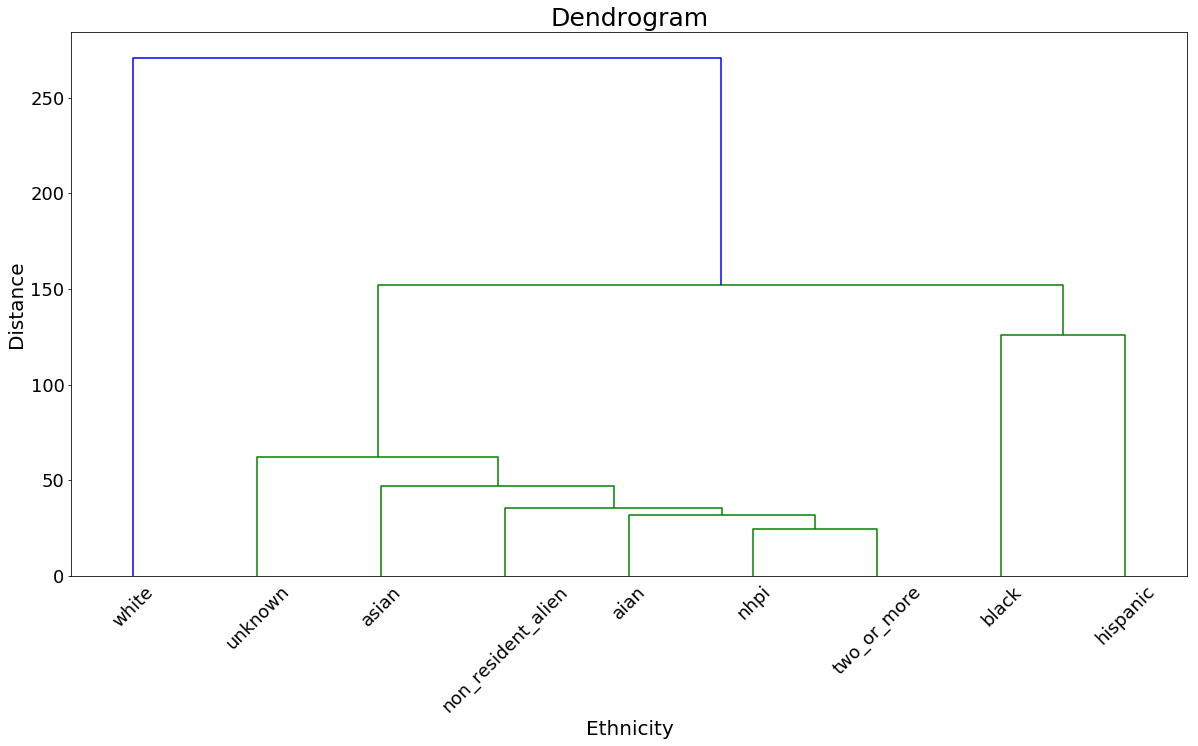

In [112]:
# Plotting:  You can see that there are 2 dstinct groupings of data
plt.figure(figsize=(20,10))
plt.yticks(fontsize = 18)
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Ethnicity', fontsize=20)
plt.ylabel('Distance', fontsize=20)
dendrogram(   # this plost the dendrogram
    Z,
    leaf_rotation=45,  
    leaf_font_size=18,
    labels=df_T['race'].tolist()
    )

plt.show()

In [77]:
# DataFrame with out the One_Hot_Encoded features for parametric evaluation
df_T_eval = df_T.iloc[:,:6741]

## Asian, AIAN, NHPI, Non_Resident_Alien, Unknown, Two_or_More

In [ ]:
# Middle Grouping Top 10
df_T_eval.iloc[[0,1,5,7,4,6]].describe().T['mean'].sort_values(ascending=False)[:10]

In [98]:
# Top 2 AIAN
df_T_eval.iloc[[0]].describe().T['mean'].sort_values(ascending=False)[:2]

Haskell Indian Nations University            1.0
Southwestern Indian Polytechnic Institute    1.0
Name: mean, dtype: float64

In [99]:
# Top 2 ASIAN
df_T_eval.iloc[[1]].describe().T['mean'].sort_values(ascending=False)[:2]

My Le's Beauty College                 1.4891
Cosmopolitan Beauty and Tech School    1.4557
Name: mean, dtype: float64

In [100]:
# Top 2 Non_resident_alien
df_T_eval.iloc[[5]].describe().T['mean'].sort_values(ascending=False)[:2]

IGlobal University                 0.9868
Unilatina International College    0.9600
Name: mean, dtype: float64

In [101]:
# Top 2 Unknown
df_T_eval.iloc[[7]].describe().T['mean'].sort_values(ascending=False)[:2]

Regency Beauty Institute-Knoxville     0.8750
Regency Beauty Institute-Fort Myers    0.8571
Name: mean, dtype: float64

In [102]:
# Top 2 NHPI
df_T_eval.iloc[[4]].describe().T['mean'].sort_values(ascending=False)[:2]

College of Micronesia-FSM    0.9995
Palau Community College      0.9968
Name: mean, dtype: float64

In [103]:
# Top 2 Two_or_more
df_T_eval.iloc[[6]].describe().T['mean'].sort_values(ascending=False)[:2]

Paul Mitchell the School-Murfreesboro    1.0000
Sunnyside Beauty Academy                 0.6923
Name: mean, dtype: float64

In [111]:
# Bottom 5 middle group
df_T_eval.iloc[[0,1,5,7,4,6]].describe().T['mean'].sort_values(ascending=False)[-5:]

Hair Academy Inc-New Carrollton                                   0.0
Hair Academy II                                                   0.0
Hair Academy                                                      0.0
HSHS St. John's Hospital School of Clinical Laboratory Science    0.0
A & W Healthcare Educators                                        0.0
Name: mean, dtype: float64

In [87]:
# Top 3 Colleges Raw Data
df_T[['race','Unitek College','Cosmopolitan Beauty and Tech School','Columbia College']]\
    .sort_values('Unitek College',ascending=False)

,race,Unitek College,Cosmopolitan Beauty and Tech School,Columbia College
,,,,
1,asian,0.7743,1.4557,0.9862
7,unknown,0.6607,0.1429,0.0624
3,hispanic,0.4808,0.0000,0.5501
4,nhpi,0.3323,0.0000,0.0073
8,white,0.3236,0.1497,2.1611
6,two_or_more,0.1582,0.0476,0.1401
2,black,0.1255,0.1973,0.6655
5,non_resident_alien,0.0794,0.0068,0.3930
0,aian,0.0651,0.0000,0.0342


## Hispanic, Black

In [79]:
# Right Group Top 10
df_T_eval.iloc[[2,3]].describe().T['mean'].sort_values(ascending=False)[:10]

Cannella School of Hair Design-Chicago        1.43885
Interactive College of Technology             1.35715
Dewey University-Hato Rey                     1.00000
Fayette Beauty Academy-Ritz Beauty Academy    1.00000
American University of Puerto Rico            1.00000
Career Point College                          0.99560
Trend Barber College                          0.98215
Hollywood Institute of Beauty Careers         0.87690
McCann School of Business & Technology        0.87365
American College of Healthcare                0.86235
Name: mean, dtype: float64

In [110]:
# Right Group Bottom 5
df_T_eval.iloc[[2,3]].describe().T['mean'].sort_values(ascending=False)[-5:]

Mifflin County Academy of Science and Technology    0.0
Sandra Academy of Salon Services Inc                0.0
Mineral County Vocational Technical Center          0.0
Mingo Extended Learning Center                      0.0
Fountain of Youth Academy of Cosmetology            0.0
Name: mean, dtype: float64

In [104]:
# Top 2 Black
df_T_eval.iloc[[2]].describe().T['mean'].sort_values(ascending=False)[:2]

Fayette Beauty Academy-Ritz Beauty Academy    2.0000
Trend Barber College                          1.8482
Name: mean, dtype: float64

In [105]:
# Top 2 Hispanic
df_T_eval.iloc[[3]].describe().T['mean'].sort_values(ascending=False)[:2]

Interactive College of Technology     2.1536
American University of Puerto Rico    2.0000
Name: mean, dtype: float64

In [91]:
# Top 3 Colleges Raw Data
df_T[['race','Cannella School of Hair Design-Chicago','Interactive College of Technology',\
      'Dewey University-Hato Rey']].sort_values('Cannella School of Hair Design-Chicago', ascending=False)

,race,Cannella School of Hair Design-Chicago,Interactive College of Technology,Dewey University-Hato Rey
,,,,
3,hispanic,1.8843,2.1536,2.0
2,black,0.9934,0.5607,0.0
7,unknown,0.0939,0.0000,0.0
1,asian,0.0189,0.2333,0.0
8,white,0.0094,0.0524,0.0
0,aian,0.0000,0.0000,0.0
4,nhpi,0.0000,0.0000,0.0
5,non_resident_alien,0.0000,0.0000,0.0
6,two_or_more,0.0000,0.0000,0.0


## White

In [94]:
# Left Group Top 10
df_T_eval.iloc[[8]].describe().T['mean'].sort_values(ascending=False)[:10]

Stevens-Henager College                                         4.4453
All Beauty College                                              2.4450
Bryan University                                                2.4331
Finger Lakes School of Massage                                  2.4306
Academy of Cosmetology                                          2.3277
Columbia College                                                2.1611
Westminster College                                             2.1536
Cosmetology Careers Unlimited College of Hair Skin and Nails    2.0000
Union College                                                   1.9924
Jenny Lea Academy of Cosmetology                                1.9200
Name: mean, dtype: float64

In [109]:
# Left Group Bottom 5
df_T_eval.iloc[[8]].describe().T['mean'].sort_values(ascending=False)[-5:]

Global Institute                     0.0
Grace College of Barbering           0.0
Grace International Beauty School    0.0
Grace Mission University             0.0
A & W Healthcare Educators           0.0
Name: mean, dtype: float64

In [96]:
# Top 3 Colleges Raw Data
df_T[['race','Stevens-Henager College','All Beauty College','Bryan University']]\
    .sort_values('Stevens-Henager College', ascending=False)

,race,Stevens-Henager College,All Beauty College,Bryan University
,,,,
8,white,4.4453,2.4450,2.4331
3,hispanic,1.0602,0.5217,0.5504
7,unknown,0.5533,0.0000,0.4107
6,two_or_more,0.3281,0.0000,0.1502
2,black,0.2666,0.0000,1.0719
0,aian,0.2069,0.0000,0.0771
4,nhpi,0.0803,0.0000,0.1857
1,asian,0.0594,0.0333,0.1210
5,non_resident_alien,0.0000,0.0000,0.0000
